In [1]:
from trdg.generators import GeneratorFromRandom
import ocr_source.batch_functions as batch_functions
import ocr_source.models as models
import ocr_source.custom_callbacks as custom_callbacks
import ocr_source.inference as inference
import ocr_source.losses as losses

import time
import importlib
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.python.client import device_lib
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession


# *********** MAGIC LINES ****************
# you might need this if training crashes due GPU memory overload
# or you get CuDNN load failure

#check for gpu
print(tf.config.list_physical_devices('GPU'))

#for tf2 magic lines to prevent razer from crashing
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)



#*************  PARAMETERS *******************
batch_size = 12
img_h = 32

# list of all characters
# map each color to an integer, a "label" and reverse mapping
all_chars = "0123456789"
num_chars = len(all_chars)
char_to_lbl_dict = dict((char, ind) for ind, char in enumerate(all_chars))
lbl_to_char_dict = dict((ind, char) for ind, char in enumerate(all_chars))


# ************** DATA GENERATORS *********************
#use trdg for the base generator of text
base_generator = GeneratorFromRandom(use_symbols=False, use_letters=False, background_type=1)

#add some more augmentation with keras ImageDataGenerator
keras_augm = ImageDataGenerator(rotation_range=2.0, width_shift_range=5.0, height_shift_range=5.0,
                                shear_range=4.0, zoom_range=0.1)

#the actual datagenerator for training and visualizations (and validation)
dg_params = {"batch_size": batch_size,"img_h": img_h, "keras_augmentor": keras_augm,
             "char_to_lbl_dict": char_to_lbl_dict}

datagen = batch_functions.OCR_generator(base_generator, **dg_params)
val_datagen = batch_functions.OCR_generator(base_generator, **dg_params, validation=True)


#*******MODEL******
model = models.make_standard_CRNN(img_h, num_chars)


#********CALLBACKS AND LOSSES****************
# get the cool outputs
predvis = custom_callbacks.PredVisualize(model,val_datagen, lbl_to_char_dict, printing=True)
model_saver = custom_callbacks.make_save_model_cb()
custom_loss = losses.custom_ctc()


#********COMPILE, SAVE MODEL**************
model.compile(loss=custom_loss, optimizer="Adam")
tf.keras.models.save_model(model, "saved_models", overwrite=True, include_optimizer=False)

Missing modules for handwritten text generation.
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_models/assets


  ...
    to  
  ['...']
Train for 500 steps
Epoch 1/10
499/500 [============================>.] - ETA: 0s - loss: 16.6081WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/keras/backend.py:5811: sparse_to_dense (from tensorflow.python.ops.sparse_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


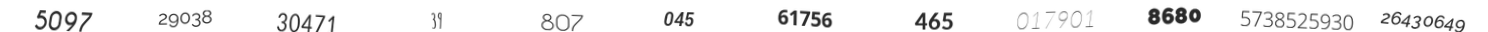

predictions ['', '', '', '', '', '', '', '', '', '', '', '']
500/500 [==============================] - 38s 75ms/step - loss: 16.6064
Epoch 2/10
499/500 [============================>.] - ETA: 0s - loss: 8.4795

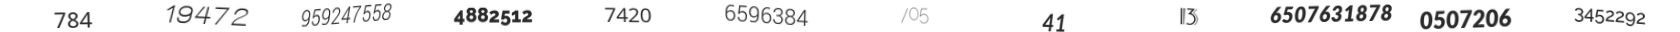

predictions ['784', '19472', '95924758', '4882512', '7420', '6596384', '705', '41', '13', '6507631878', '0507206', '3452292']
500/500 [==============================] - 36s 71ms/step - loss: 8.4661
Epoch 3/10
499/500 [============================>.] - ETA: 0s - loss: 1.5438

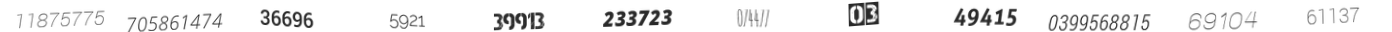

predictions ['11875775', '705861474', '36696', '592', '39913', '233723', '147', '', '49415', '0399568815', '59104', '61137']
500/500 [==============================] - 36s 72ms/step - loss: 1.5414
Epoch 4/10
499/500 [============================>.] - ETA: 0s - loss: 0.9342

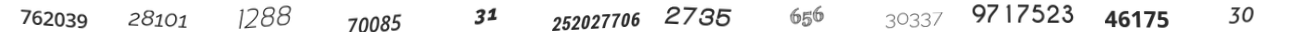

predictions ['762039', '28101', '1280', '70085', '31', '252027706', '2735', '656', '30337', '9717523', '46175', '30']
500/500 [==============================] - 36s 71ms/step - loss: 0.9375
Epoch 5/10
499/500 [============================>.] - ETA: 0s - loss: 0.7074WARNING:tensorflow:5 out of the last 5 calls to <function _make_execution_function.<locals>.distributed_function at 0x7f05ac6aed90> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings is likely due to passing python objects instead of tensors. Also, tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. Please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for more details.


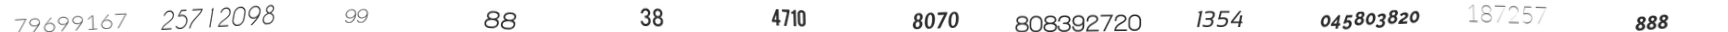

predictions ['79699167', '25712098', '99', '88', '38', '4710', '8070', '808392720', '1354', '045803820', '1287257', '888']
500/500 [==============================] - 36s 72ms/step - loss: 0.7061
Epoch 6/10
499/500 [============================>.] - ETA: 0s - loss: 0.5469WARNING:tensorflow:6 out of the last 6 calls to <function _make_execution_function.<locals>.distributed_function at 0x7f05ac6aed90> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings is likely due to passing python objects instead of tensors. Also, tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. Please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for more details.


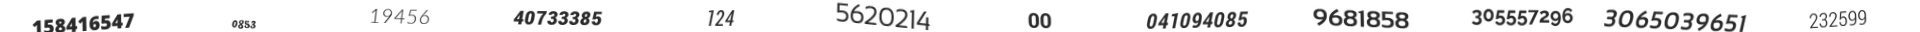

predictions ['158416547', '083', '19456', '40733385', '124', '5620214', '00', '041094085', '9681858', '305557296', '3065039651', '232599']
500/500 [==============================] - 36s 71ms/step - loss: 0.5458
Epoch 7/10
499/500 [============================>.] - ETA: 0s - loss: 0.4440WARNING:tensorflow:7 out of the last 7 calls to <function _make_execution_function.<locals>.distributed_function at 0x7f05ac6aed90> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings is likely due to passing python objects instead of tensors. Also, tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. Please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for more details.


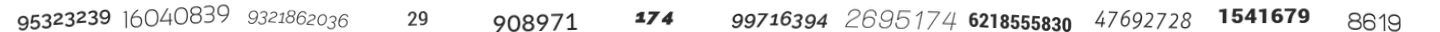

predictions ['95323239', '16008389', '9321862036', '29', '908971', '174', '99716394', '2695174', '6218555830', '47692728', '1541679', '8618']
500/500 [==============================] - 36s 71ms/step - loss: 0.4440
Epoch 8/10
499/500 [============================>.] - ETA: 0s - loss: 0.4880

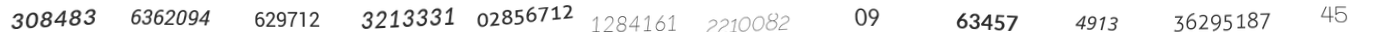

predictions ['308483', '6362094', '629712', '3213331', '02856712', '1284161', '3310082', '09', '63457', '4913', '36295187', '45']
500/500 [==============================] - 36s 72ms/step - loss: 0.4871
Epoch 9/10
499/500 [============================>.] - ETA: 0s - loss: 0.3259

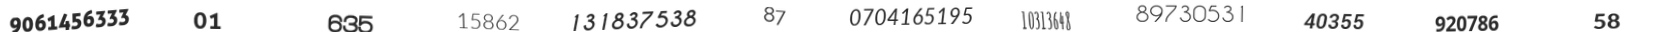

predictions ['9061456333', '01', '635', '15862', '131837538', '87', '0704165195', '1013648', '89730531', '40355', '920786', '58']
500/500 [==============================] - 36s 73ms/step - loss: 0.3253
Epoch 10/10
499/500 [============================>.] - ETA: 0s - loss: 0.2742

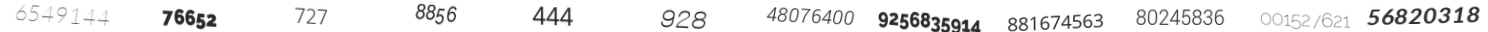

predictions ['6549144', '76652', '727', '8856', '444', '928', '48076400', '9256835914', '881674563', '80245836', '001527621', '56820318']
500/500 [==============================] - 37s 74ms/step - loss: 0.2745


In [2]:
H = model.fit(datagen, epochs=10, verbose=1, callbacks=[predvis, model_saver])

model loaded


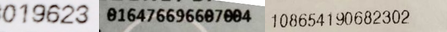

predictions ['1019623', '1616476696687667', '108654190682302']
inference time with image loading, model loading, preprocessing etc: 0.2673192024230957


In [3]:
# do a test inference from the files in inference_test_imgs/
# why there are errors?
# - The model has been not trained on the domain, character size,
# character separation, margins, background
# overfitting to training data so use more regularization etc etc
start = time.time()
inference.inference_from_folder()
end = time.time()
print("inference time with image loading, model loading, preprocessing etc:", end - start)